In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
importsys 




In [14]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


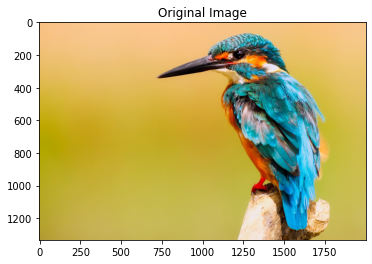

In [15]:
# Load an image:
image_path = "/content/gdrive/MyDrive/Assignment/bird.jpg"
image = Image.open(image_path)
pixels = image.load()
width, height = image.size

# Display image in notebook:
%matplotlib inline
plt.title("Original Image")
plt.imshow(np.asarray(image))


In [16]:
#Map pixel values to vectors
vector_list = np.array([pixels[x, y] for x in range(width) for y in range(height)])

# Print the number of image vectors created
print(f'Image file with dimensions {width}x{height} pixels turned into {vector_list.shape[0]} vectors.')

Image file with dimensions 2000x1333 pixels turned into 2666000 vectors.


In [21]:


#DBScan Implementation

#If using this then correct dbscan and FindNeighbours to have a param to differentiate the distance methods.
def MaximumDistance(P,Q):
    intermediateValues = []
    for i in range(len(P[2])):
        intermediateValues.append(abs(Q[2][i]-P[2][i]))
    return max(intermediateValues).tolist()


#Finds all neighbor points for a chosen point
def FindNeighbours(Point, Points, eps):
    tempNeighbours = []
    for y in range(len(Points)):
        for x in range(len(Points[0])):
            if MaximumDistance(Point, Points[y][x]) <= eps:
                    tempNeighbours.append(Points[y][x])
#Note: use Max Distance if required 
    return tempNeighbours

#reads vector array, performs dbscan and outputs vector array
def dbscan(vectors: list, minpts: int, epsilon: int) -> list:
    #Initialization
    pointsArray = []
    for y in range(len(vectors)):
        pointsArray.append([])
        for x in range(len(vectors[0])):
            pointsArray[y].append([y,x,vectors[y][x],"Undefined"])
            
    #DBSCAN clustering
    clusterCounter = 0
    for y in range(len(vectors)):
        for x in range(len(vectors[0])):
            if pointsArray[y][x][-1] != "Undefined":
                continue

            Neighbours = FindNeighbours(pointsArray[y][x], pointsArray, epsilon)
            if len(Neighbours) < minpts:
                pointsArray[y][x][-1] = "Noise"
                continue

            clusterCounter = clusterCounter + 1
            pointsArray[y][x][-1] = str(clusterCounter)
            if pointsArray[y][x] in Neighbours:
                Neighbours.remove(pointsArray[y][x])

            for innerPoint in Neighbours:
                if innerPoint[-1] == "Noise":
                    pointsArray[innerPoint[0]][innerPoint[1]][-1] = str(clusterCounter)
                if innerPoint[-1] != "Undefined":
                    continue
                pointsArray[innerPoint[0]][innerPoint[1]][-1] = str(clusterCounter)
                NeighboursInner = FindNeighbours(innerPoint, pointsArray, epsilon)
                if len(NeighboursInner) >= minpts:
                    Neighbours.append(NeighboursInner)
                    
                   
    #Get distinct clusters
    clusterNumbers = []
    for y in range(len(vectors)):
        for x in range(len(vectors[0])):
            if pointsArray[y][x][-1] not in clusterNumbers:
                clusterNumbers.append(pointsArray[y][x][-1])
    #Map cluster's averages
    averagesForClusters = []
    for item in clusterNumbers:
        n = 0
        vectorTemps = [0]*len(pointsArray[0][0][2])
        for y in range(len(vectors)):
            for x in range(len(vectors[0])):
                if pointsArray[y][x][-1] == item:
                    for i in range(len(pointsArray[y][x][2])):
                        vectorTemps[i] = vectorTemps[i] + pointsArray[y][x][2][i]
                    n = n + 1
        #Check Zero division
        for i in range(len(vectorTemps)):
            if vectorTemps[i] != 0:
                vectorTemps[i] = vectorTemps[i]/n
        averagesForClusters.append(vectorTemps)
    #Build clustered array and change cluster averages with initial values
    clusteredVectors = []
    for y in range(len(pointsArray)):
        clusteredVectors.append([])
        for x in range(len(pointsArray[0])):
            clusteredVectors[y].append(averagesForClusters[clusterNumbers.index(pointsArray[y][x][-1])])
    return clusteredVectors

In [24]:
# Perform clustering on the vectors:
dbscan_clusters =dbscan(vector_list, minpts=100, epsilon=100)

TypeError: ignored

In [ ]:
#reads vector array and generates an image
def createImage(vectors: list):
    vecLen = len(vectors[0][0])
    #Check supported model and initialize image
    if vecLen == 3:
        image = Image.new('RGB', (len(vectors[0]),len(vectors)))
    elif vecLen == 4:
        image = Image.new('RGBA', (len(vectors[0]),len(vectors)))
    else:
        print("Unsupported model")
        sys.exit(1)

    #Map array values to image
    pixel = image.load()
    for y in range(len(vectors)):
        for x in range(len(vectors[0])):
            r = int(round(vectors[y][x][0]))
            g = int(round(vectors[y][x][1]))
            b = int(round(vectors[y][x][2]))
            if vecLen == 3:
                pixel[x,y] = (r,g,b)
            elif vecLen == 4:
                a = int(round(vectors[y][x][3]))
                pixel[x,y] = (r,g,b,a)        
    return image


# Display the clustered image:
def Display(Image,Alg):
    %matplotlib inline
    plt.title(Alg+' Segmented')
    plt.imshow(np.asarray(Image))

#DBScan Image
Display(createImage(dbscan_clusters),"DBScan")